In [14]:
from PIL import Image
from os import listdir
import re
import numpy as np
import matplotlib.image as mpimg

import matplotlib.pyplot as plt
# Load the necessary script
%run '../src/EigenSpace.py'
%run '../src/EigenCrossValidation.py'
%run '../src/EigenSplitValidation.py'
%run '../src/ModelerView.py'
pathToImages = '../images/yalefaces/'

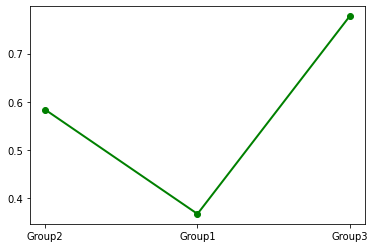

In [15]:
# Criar uma lista onde cada element possui um url e um tag, associada a imagem
imagesWithTags = []
for f in listdir(pathToImages):
    viewGrouping = 'Group3'
    regex_groups = re.match('subject([0-9]+)\.(.+)',f).groups()
    img = getImageByUrl(pathToImages + f)
    tag = int(regex_groups[0])
    view = regex_groups[1]

    if view in ['centerlight', 'glasses', 'happy', 'leftlight']:
        viewGrouping = 'Group1'
    elif view in ['noglasses', 'normal', 'rightlight', 'sad']:
        viewGrouping = 'Group2'

    imagesWithTags.append({"img":img,"tag":tag,"view":viewGrouping})

    

# Criar eigenSpace com as imagens acima.
eSpace = ModelerView(imagesWithTags, crossK=3)
eSpace.plotAccuracyByGroup()


In [16]:
eSpace.accuracy()

0.575925925925926

In [17]:
eSpace.accuracyP("Group3")

0.7777777777777777


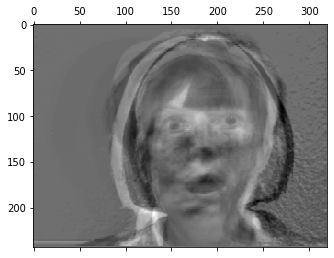

In [18]:
eSpace.plotEigenFace("Group3",11)

In [25]:
eSpace.plotAverageFace("Group3")

invalid view mode


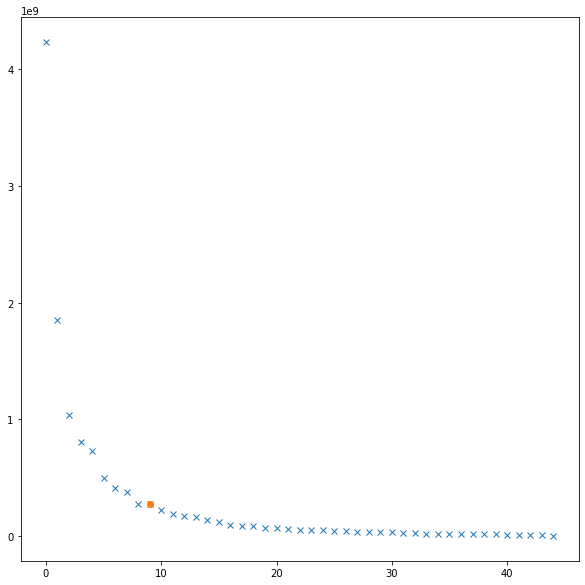

In [20]:
eSpace.plotEigenValues("Group3")

In [21]:
predictFace = Image.open(f'../images/1.image').convert('L').getdata()
eSpace.predictFace("Group3",predictFace)

(2, 5525.239175297613, 37)


In [24]:
#projectFace = Image.open(f'../images/1.image').convert('L').getdata()
#plt.matshow(eSpace.projectFace("Group3",projectFace), cmap="gray")